# Assignment 03: Rasters and Tables

For this assignment, you will be using Numpy, GDAL, and Pandas. Most of these questions  can be solved using methods shown in lecture. However, some cases will require you to search the internet for answers. This is intended because efficiently searching documentation or Stackoverflow is a requirement of modern programing. This assignment also requires you to obtain data (I will tell you where) and organize it correctly so that you can access is via relative paths (do not use absolute paths anywhere in this assignment).

To turn this in, create a PDF of your finished Jupyter notebook using Quarto (we will discuss this on Tuesday) and upload it to Canvas.


## Question 1

For this question, you will be using numpy to manipulate arrays in a way that works well for big data and will be using spatial tools to assess land-use change. Specifically, you will use data from a global, 300m resolution land-use, land-cover (LULC) map produced by ESACCI. They provide a wonderful time series of data from 1992-2019. If you want more information, check out their web viewer at https://maps.elie.ucl.ac.be/CCI/viewer/. Here you can view the data but also learn more about the classification regressions that uses time-series spectral data patterns to classify grid-cells into different types. I have extracted lulc maps for the country of Rwanda, which you will find in this assignment's data folder.

### Part a. 

Using the gdal package and the gdal.Open() function, open up the land-use, land-cover map for Rwanda in 2000. 

In this file, there is only 1 band in this file, so you can also access it with the GetRasterBand(1) function. Without reading the whole array, show how you can determine how many total grid-cells there are in this country.

In [31]:
# 1A Answer
import os, random
print(os.getcwd())

/Users/prayashpathak/Files/APEC8222/Repos/a-pec_8222_prayash_pathak/big_data_for_economists/Assignments


In [32]:
#file name 
lulc_Rwanda_2000 = 'rwanda_lulc_2000.tif'

#data directory
data_directory = '../../../../data' 

#joining them together
lulc_file_path_2000 = os.path.join(data_directory, lulc_Rwanda_2000)

print('lulc_file_path', lulc_file_path_2000)

# Also checking if the file path is correctly defined
print("Does the file exist?", os.path.exists(lulc_file_path_2000))

lulc_file_path ../../../../data/rwanda_lulc_2000.tif
Does the file exist? True


In [33]:
from osgeo import gdal
import numpy as np
import os, random
import matplotlib.pyplot as plt

lulc_dataset_2000 = gdal.Open(lulc_file_path_2000)
print(lulc_dataset_2000)

lulc_dataset_band_2000 = lulc_dataset_2000.GetRasterBand(1)

#now we print the number of rows and column that can be multiplied to 
# print total grid cells
n_rows = lulc_dataset_2000.RasterYSize
print('Number of rows in a GDAL dataset', n_rows)

n_cols = lulc_dataset_2000.RasterXSize
print('Number of columns in a GDAL dataset', n_cols)

grid_cells = n_rows * n_cols
print("Total grid cells", grid_cells)


<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x136ede880> >
Number of rows in a GDAL dataset 637
Number of columns in a GDAL dataset 732
Total grid cells 466284


### Part b.

Using the results of part a, read the whole array into memory as a numpy array (the default option when using the ReadAsArray() funciton), and plot it using the matplotlib imshow command. Add a nice title to the plot describing what it is.

In [34]:
#1B Answer
# the array is named as array_2000
array_2000 = lulc_dataset_band_2000.ReadAsArray()
shape_2000 = array_2000.shape
print(array_2000)
print('To check for the shape we got from 1(a):', shape_2000)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
To check for the shape we got from 1(a): (637, 732)


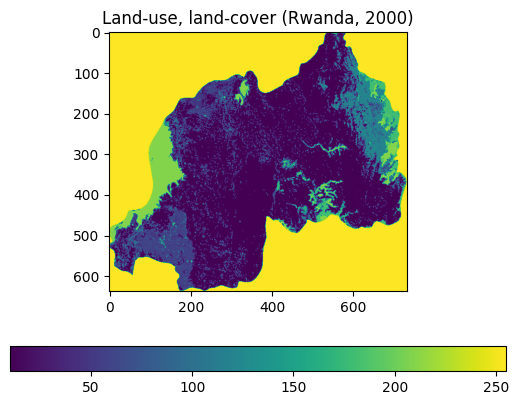

In [35]:

import matplotlib.pyplot as plt

plt.imshow(array_2000)
plt.title('Land-use, land-cover (Rwanda, 2000)')
plt.colorbar(orientation='horizontal')
plt.show()

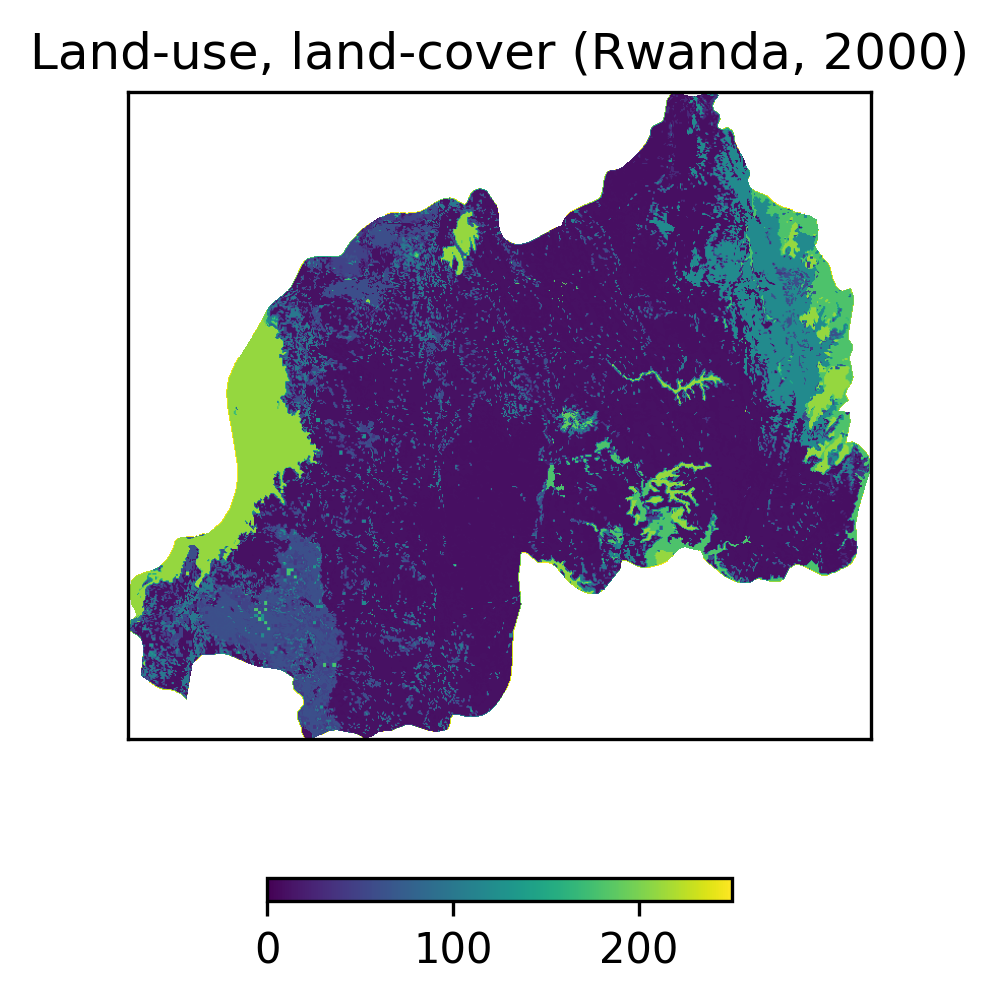

In [36]:
#using the second method to make prettier plots
fig = plt.figure(figsize=(4, 4))
fig.set_dpi(300)

ax = fig.add_subplot()

# Set the title of this ax object
ax.set_title('Land-use, land-cover (Rwanda, 2000)')

# Using the ax we created, we call the imshow function on our array from earlier. 
# This create a new "im" object
im = ax.imshow(array_2000)

# To fix the outlier problem from before, we use the im object to set its limits.
im.set_clim(0, 250)

# Set the cbar to spectral
im.set_cmap('viridis')

# Get the cmap
cmap = im.get_cmap()
cmap.set_over('white', alpha=1.0)

# Get rid of the numbers on the axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

# Increase the dpi
fig.set_dpi(300)


# Add the colorbar to the figure. It will generate its values from the im object.
fig.colorbar(im, orientation='horizontal', shrink=0.5)

plt.show()

### Part c.

Using the legend you find at https://maps.elie.ucl.ac.be/CCI/viewer/download/ESACCI-LC-QuickUserGuide-LC-Maps_v2-0-7.pdf reclassify the LULC into a simplified map where 1 = cropland (including any mosaic types that are partially cropland) and 0 = anything else. Plot this using imshow.

[ 10  11  12  20  30  40  50  60  61  62  70 100 110 120 122 130 150 160
 170 180 190 200 210 255]
[  0   1 210 255]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


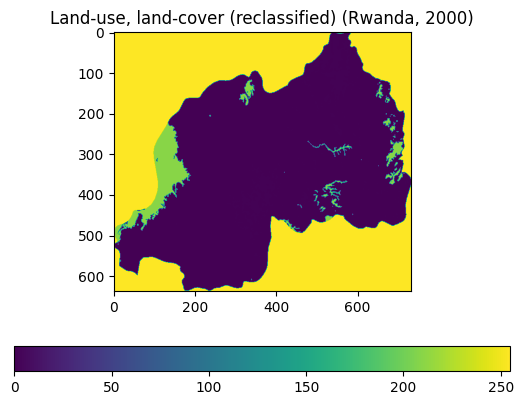

In [37]:
# 1C Answer
import numpy as np
unique_values_2000 = np.unique(array_2000)
print(unique_values_2000)

#reclassified LULC for cropland as 1 and anything else as 0
reclassified_array_2000 = np.where((array_2000 ==10)|(array_2000 ==20)|
(array_2000 ==30)|(array_2000 ==40), 1,0)

#lookig at my plots, I realized the reclassifciation of anything else to 0
#  was also converting 255 (no data) to 0 which made the 
#plot really wierd so I fixed it
reclassified_array_2000[array_2000== 255] = 255
reclassified_array_2000[array_2000== 210] = 210


#makign sure my code worked
unique_relcassified_array_2000 = np.unique(reclassified_array_2000)
print(unique_relcassified_array_2000)
print(reclassified_array_2000)

#plot of reclassified LULC
plt.imshow(reclassified_array_2000)
plt.title('Land-use, land-cover (reclassified) (Rwanda, 2000)')
plt.colorbar(orientation='horizontal')
plt.show()


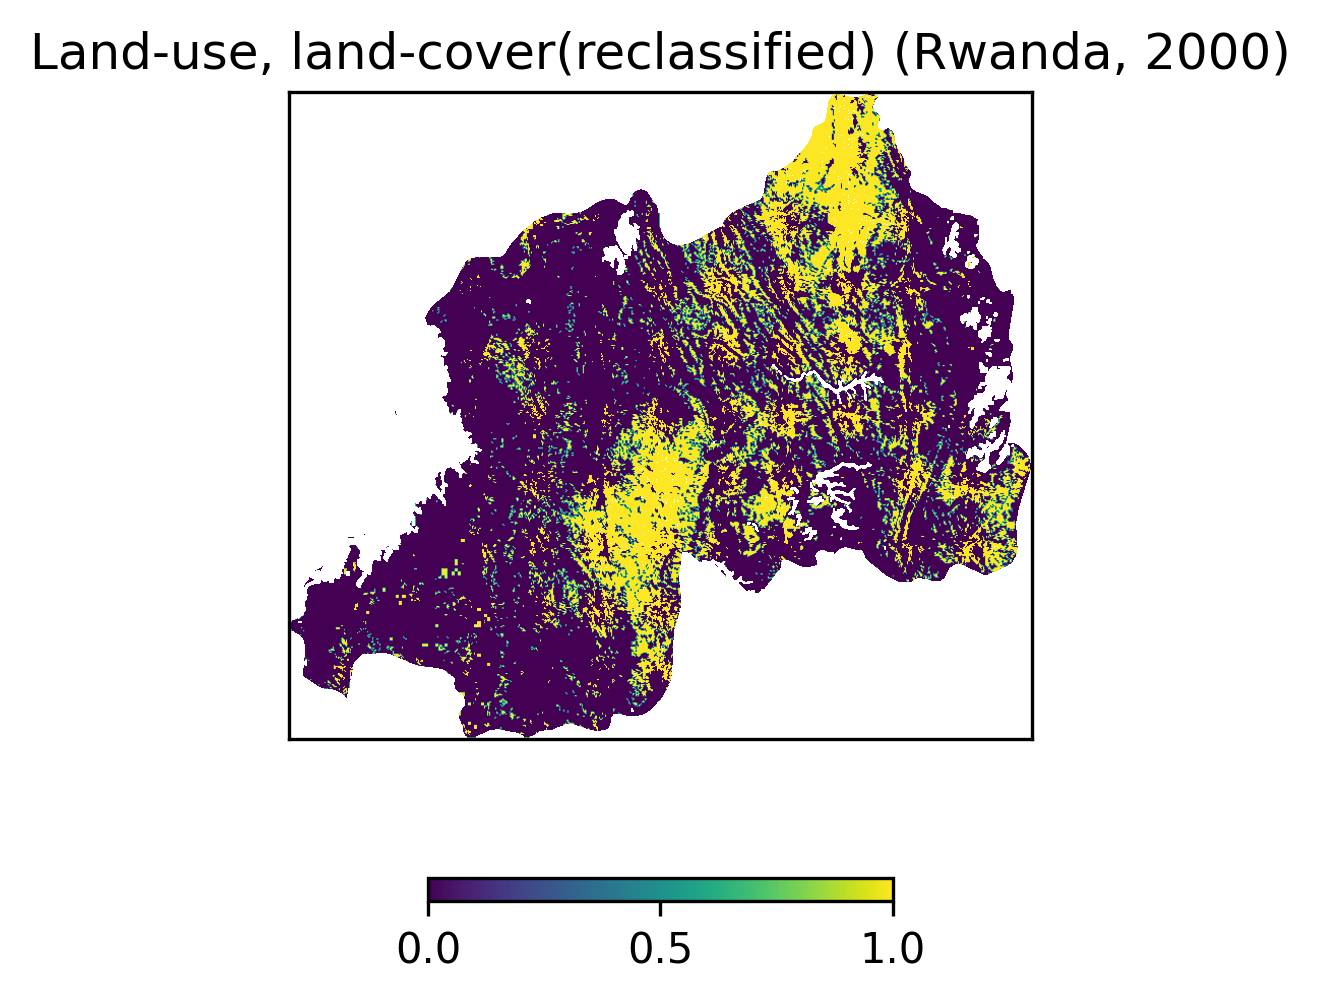

In [38]:
#using the second method to make prettier plots
fig = plt.figure(figsize=(4, 4))
fig.set_dpi(300)

ax = fig.add_subplot()

# Set the title of this ax object
ax.set_title('Land-use, land-cover(reclassified) (Rwanda, 2000)')

# Using the ax we created, we call the imshow function on our array from earlier.
#  This create a new "im" object
im = ax.imshow(reclassified_array_2000)

# To fix the outlier problem from before, we use the im object to set its limits.
im.set_clim(0, 1)

# Set the cbar to spectral
im.set_cmap('viridis')

# Get the cmap
cmap = im.get_cmap()
cmap.set_over('white', alpha=1.0)

# Get rid of the numbers on the axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

# Increase the dpi
fig.set_dpi(300)


# Add the colorbar to the figure. It will generate its values from the im object.
fig.colorbar(im, orientation='horizontal', shrink=0.5)

plt.show()

### Part d.

Repeat the process for the 2010 LULC map. Using this array with the one from part c, create a new array that records where there was cropland expansion (i.e., there is cropland in 2010 but not in 2000) and where there was cropland abandonment (cropland in 2000 but not in 2010). Save this classification in a single new array. Plot this last array. Optionally, add a legend indicating which values in the array denote expansion and abandonment using some variant of `ax.legend()'. 

(637, 732)
[ 10  11  12  20  30  40  50  60  61  62  70 100 110 120 122 130 150 160
 170 180 190 200 210 255]
[  0   1 210 255]


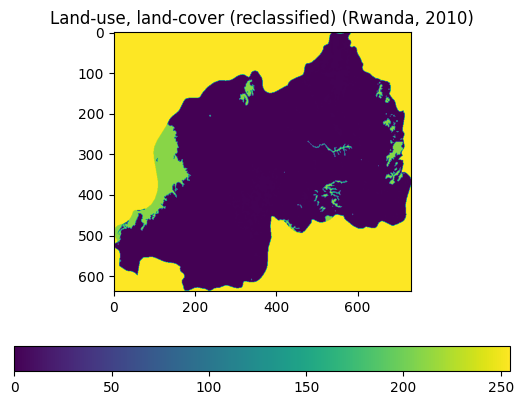

In [39]:
# 2D Answer
#define the file path for Rwanda 2010
#file name 
lulc_Rwanda_2010 = 'rwanda_lulc_2010.tif'

#data directory
data_directory = '../../../../data' 

#joining them together
lulc_file_path_2010 = os.path.join(data_directory, lulc_Rwanda_2010)

#use the function load_array to load raster into a numpy array.
def load_array(input_raster_path):
    """Load a raster into a numpy array"""
    raster = gdal.Open(input_raster_path)
    band = raster.GetRasterBand(1)
    array = band.ReadAsArray()
    return array
array_2010 = load_array(lulc_file_path_2010)
print(array_2010.shape)

#looking at the unique values of array_2010
unique_values_2010 = np.unique(array_2010)
print(unique_values_2010)

#reclassified LULC for cropland as 1 and anything else as 0
reclassified_array_2010 = np.where((array_2010 ==10)|(array_2010 ==20)|(array_2010 ==30)|
(array_2010 ==40), 1,0)

#just like above change 255 to 3, so that it does not get converted 
# to 0 with everything else
reclassified_array_2010[array_2010== 255] = 255
reclassified_array_2010[array_2010== 210] = 210

#makign sure my code worked
unique_relcassified_array_2010 = np.unique(reclassified_array_2010)
print(unique_relcassified_array_2010)

#plot of reclassified LULC
plt.imshow(reclassified_array_2010)
plt.title('Land-use, land-cover (reclassified) (Rwanda, 2010)')
plt.colorbar(orientation='horizontal')
plt.show()


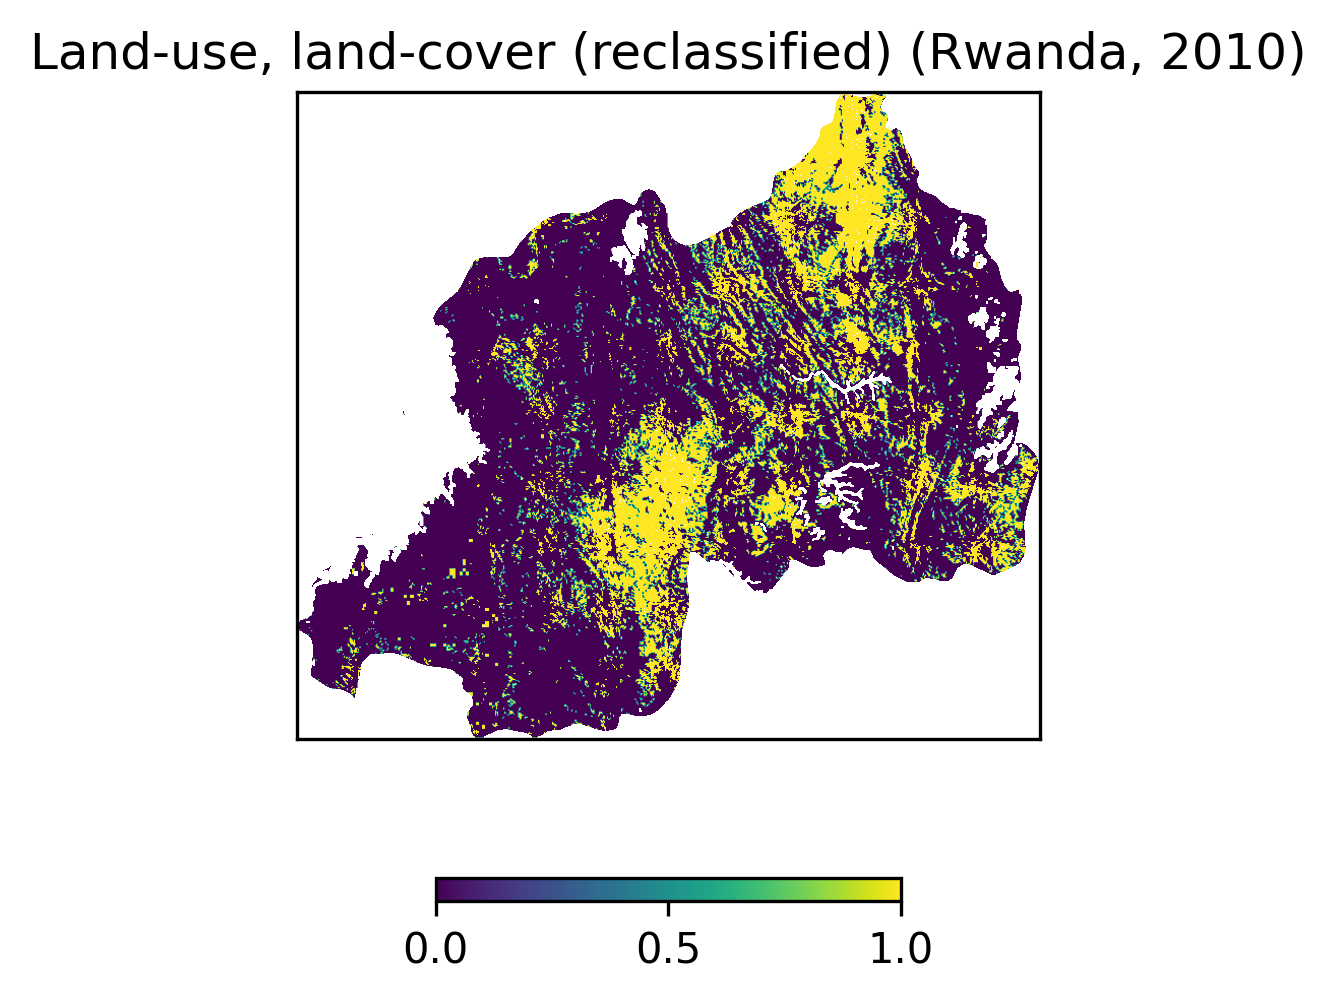

In [40]:
#using the second method to make prettier plots
fig = plt.figure(figsize=(4, 4))
fig.set_dpi(300)

ax = fig.add_subplot()

# Set the title of this ax object
ax.set_title('Land-use, land-cover (reclassified) (Rwanda, 2010)')

# Using the ax we created, we call the imshow function on our array from earlier.
#  This create a new "im" object
im = ax.imshow(reclassified_array_2000)

# To fix the outlier problem from before, we use the im object to set its limits.
im.set_clim(0, 1)

# Set the cbar to spectral
im.set_cmap('viridis')

# Get the cmap
cmap = im.get_cmap()
cmap.set_over('white', alpha=1.0)

# Get rid of the numbers on the axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

# Increase the dpi
fig.set_dpi(300)


# Add the colorbar to the figure. It will generate its values from the im object.
fig.colorbar(im, orientation='horizontal', shrink=0.5)

plt.show()

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[  0   1   2 210 255]


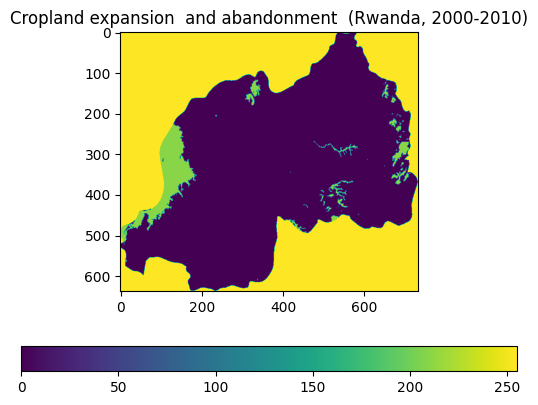

In [41]:
#create an empty array of same shape and name it new_array
new_array = np.copy(reclassified_array_2010)

#now we compare the reclassified LULC of 2000 and 2010 and record cropland expansion 
# adnabandonment as 1 and 2 respectively

new_array[np.logical_and(reclassified_array_2000 == 0, reclassified_array_2010 == 0)] = 0
 #no changes
new_array[np.logical_and(reclassified_array_2000 == 1, reclassified_array_2010 == 1)] = 0 
#no changes
new_array[np.logical_and(reclassified_array_2000 == 0, reclassified_array_2010 == 1)] = 1
 #cropland expansion
new_array[np.logical_and(reclassified_array_2000 == 1, reclassified_array_2010 == 0)] = 2 
#cropland abandonment


print(new_array)

#print unique values of this new array (making sure it consist of 0 as no change, 
# 1 as expansion, 2 as abandonment and 3 as no data )
unique_new_array = np.unique(new_array)
print(unique_new_array)

#plot of reclassified LULC
plt.imshow(new_array)
plt.title('Cropland expansion  and abandonment  (Rwanda, 2000-2010)')
plt.colorbar(orientation='horizontal')
plt.show()


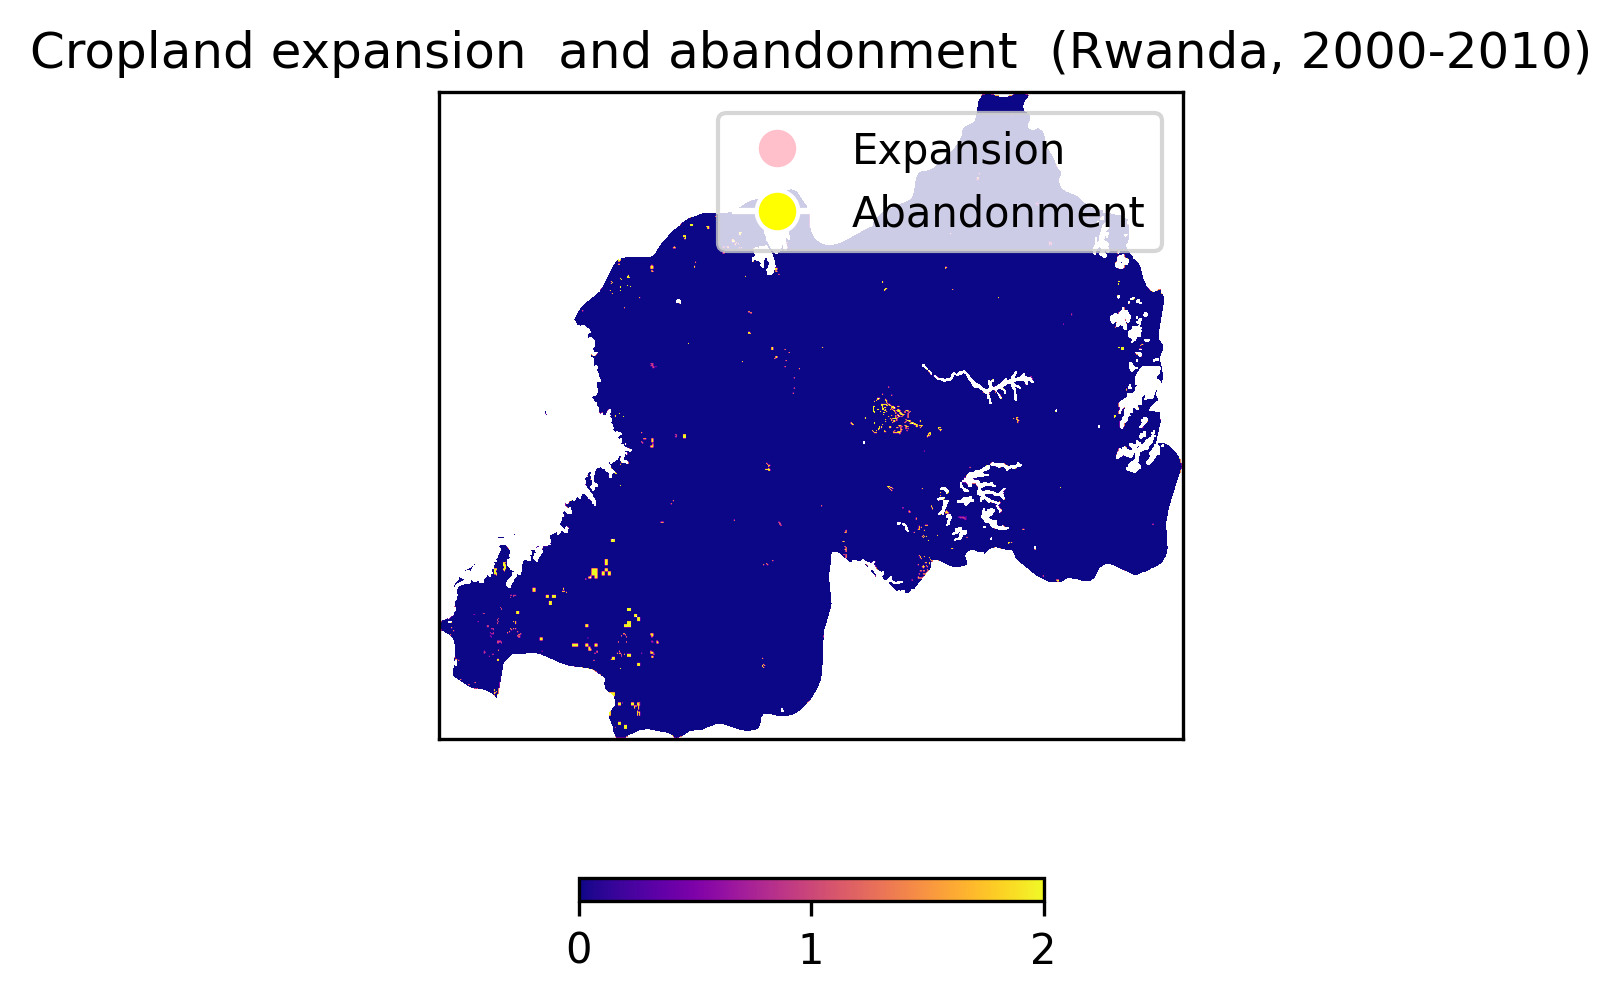

In [42]:
#using the second method to make prettier plots
fig = plt.figure(figsize=(4, 4))
fig.set_dpi(300)

ax = fig.add_subplot()

# Set the title of this ax object
ax.set_title('Cropland expansion  and abandonment  (Rwanda, 2000-2010)')

# Using the ax we created, we call the imshow function on our array from earlier.
#  This create a new "im" object
im = ax.imshow(new_array)

# To fix the outlier problem from before, we use the im object to set its limits.
im.set_clim(0, 2)

# Set the cbar to spectral
im.set_cmap('plasma')

# Get the cmap
cmap = im.get_cmap()
cmap.set_over('white', alpha=1.0)

# Get rid of the numbers on the axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

# Increase the dpi
fig.set_dpi(300)


# Add the colorbar to the figure. It will generate its values from the im object.
fig.colorbar(im, orientation='horizontal', shrink=0.5)

# Add legend
legend_labels = {1: 'Expansion', 2: 'Abandonment'}
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='pink', 
markersize=10, label=legend_labels[1]),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow',
                     markersize=10, label=legend_labels[2])])


plt.show()

### Part e.

Repeat the all the steps in part d, but with the 2015 LULC map, calculating the difference between 2015 and 2010.

(637, 732)
[ 10  11  12  20  30  40  50  60  61  62  70 100 110 120 122 130 150 160
 170 180 190 200 210 255]
[  0   1 210 255]


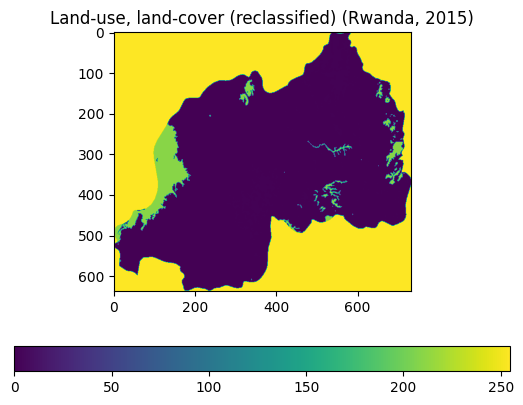

In [43]:
# 2E Answer
#define the file path for Rwanda 2015
#file name 
lulc_Rwanda_2015 = 'rwanda_lulc_2015.tif'

#data directory
data_directory = '../../../../data' 

#joining them together
lulc_file_path_2015 = os.path.join(data_directory, lulc_Rwanda_2015)

#use the function load_array to load raster into a numpy array.
def load_array(input_raster_path):
    """Load a raster into a numpy array"""
    raster = gdal.Open(input_raster_path)
    band = raster.GetRasterBand(1)
    array = band.ReadAsArray()
    return array
array_2015 = load_array(lulc_file_path_2015)
print(array_2015.shape)

#looking at the unique values of array_2015
unique_values_2015 = np.unique(array_2015)
print(unique_values_2015)

#reclassified LULC for cropland as 1 and anything else as 0
reclassified_array_2015 = np.where((array_2015 ==10)|(array_2015 ==20)
|(array_2015 ==30)|(array_2015 ==40), 1,0)

#just like above change 255 to 3, so that it does not get converted 
# to 0 with everything else
reclassified_array_2015[array_2015 == 255] = 255
reclassified_array_2015[array_2015 == 210] = 210


#makign sure my code worked
unique_relcassified_array_2015 = np.unique(reclassified_array_2015)
print(unique_relcassified_array_2015)

#plot of reclassified LULC
plt.imshow(reclassified_array_2015)
plt.title('Land-use, land-cover (reclassified) (Rwanda, 2015)')
plt.colorbar(orientation='horizontal')
plt.show()


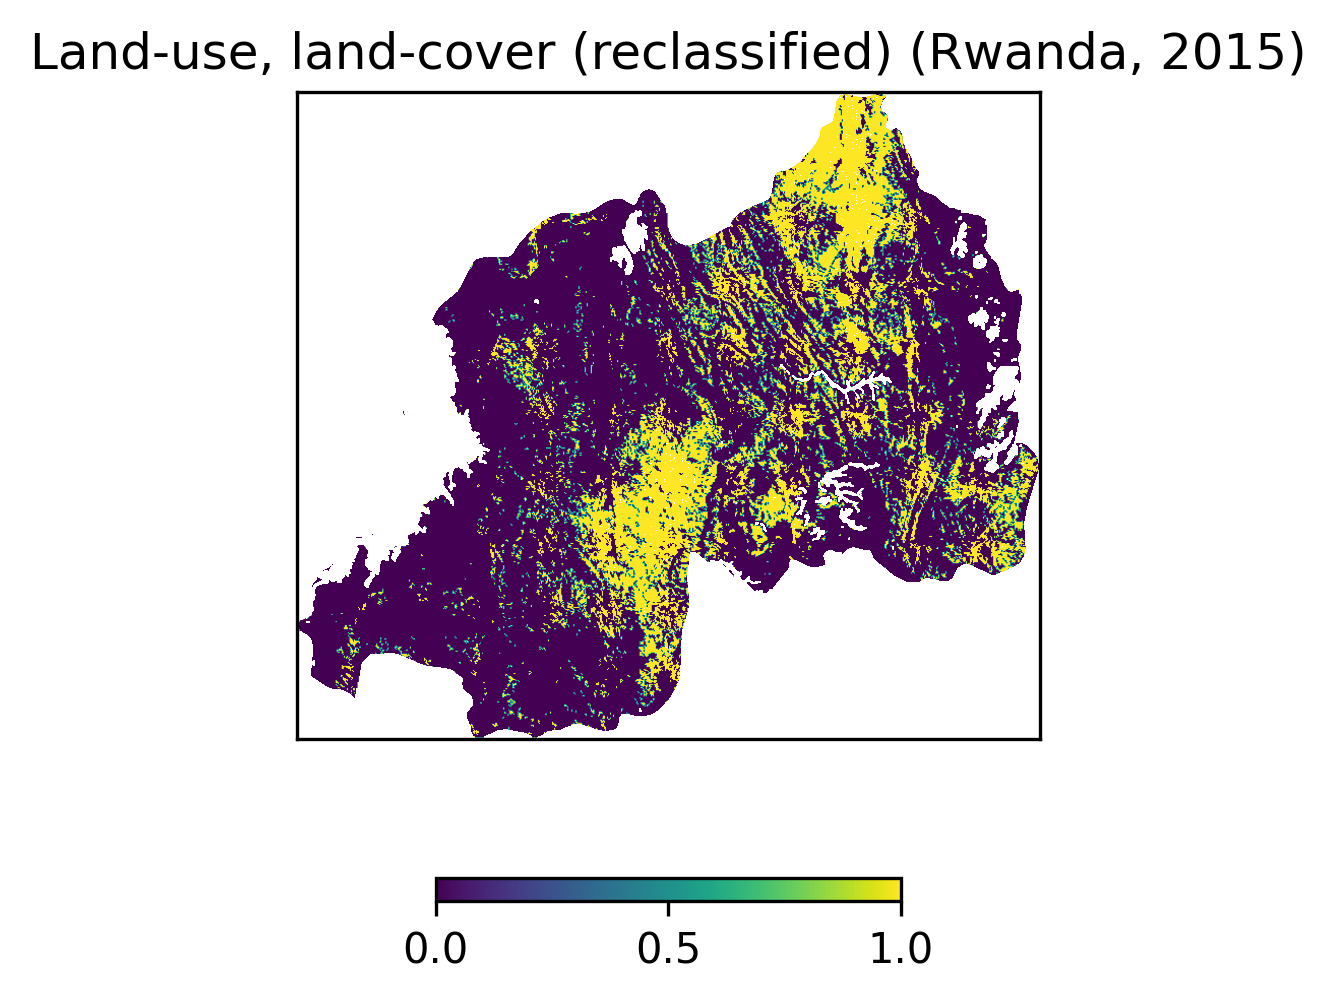

In [44]:
#using the second method to make prettier plots
fig = plt.figure(figsize=(4, 4))
fig.set_dpi(300)

ax = fig.add_subplot()

# Set the title of this ax object
ax.set_title('Land-use, land-cover (reclassified) (Rwanda, 2015)')

# Using the ax we created, we call the imshow function on our array from earlier. 
# This create a new "im" object
im = ax.imshow(reclassified_array_2015)

# To fix the outlier problem from before, we use the im object to set its limits.
im.set_clim(0, 1)

# Set the cbar to spectral
im.set_cmap('viridis')

# Get the cmap
cmap = im.get_cmap()
cmap.set_over('white', alpha=1.0)

# Get rid of the numbers on the axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

# Increase the dpi
fig.set_dpi(300)


# Add the colorbar to the figure. It will generate its values from the im object.
fig.colorbar(im, orientation='horizontal', shrink=0.5)

plt.show()

In [45]:
#create an empty array of same shape and name it new_array
new_array2 = np.copy(reclassified_array_2015)

#now we compare the reclassified LULC of 2000 and 2010 and record cropland expansion 
# adnabandonment as 1 and 2 respectively
new_array2[np.logical_and(reclassified_array_2010 == 0, reclassified_array_2015 == 0)] 
= 0 #no changes
new_array2[np.logical_and(reclassified_array_2010 == 1, reclassified_array_2015 == 1)] 
= 0 #no changes
new_array2[np.logical_and(reclassified_array_2010 == 0, reclassified_array_2015 == 1)] 
= 1 #cropland expansion
new_array2[np.logical_and(reclassified_array_2010 == 1, reclassified_array_2015 == 0)] 
= 2 #cropland abandonment


print(new_array2)

#print unique values of this new array (making sure it consist of 0 as no change, 1 
# as expansion, 2 as abandonment and 3 as no data )
unique_new_array2 = np.unique(new_array2)
print(unique_new_array2)

#plot of reclassified LULC
plt.imshow(new_array2)
plt.title('Cropland expansion  and abandonment  (Rwanda, 2010-2015)')
plt.colorbar(orientation='horizontal')
plt.show()


SyntaxError: invalid syntax (3430605103.py, line 7)

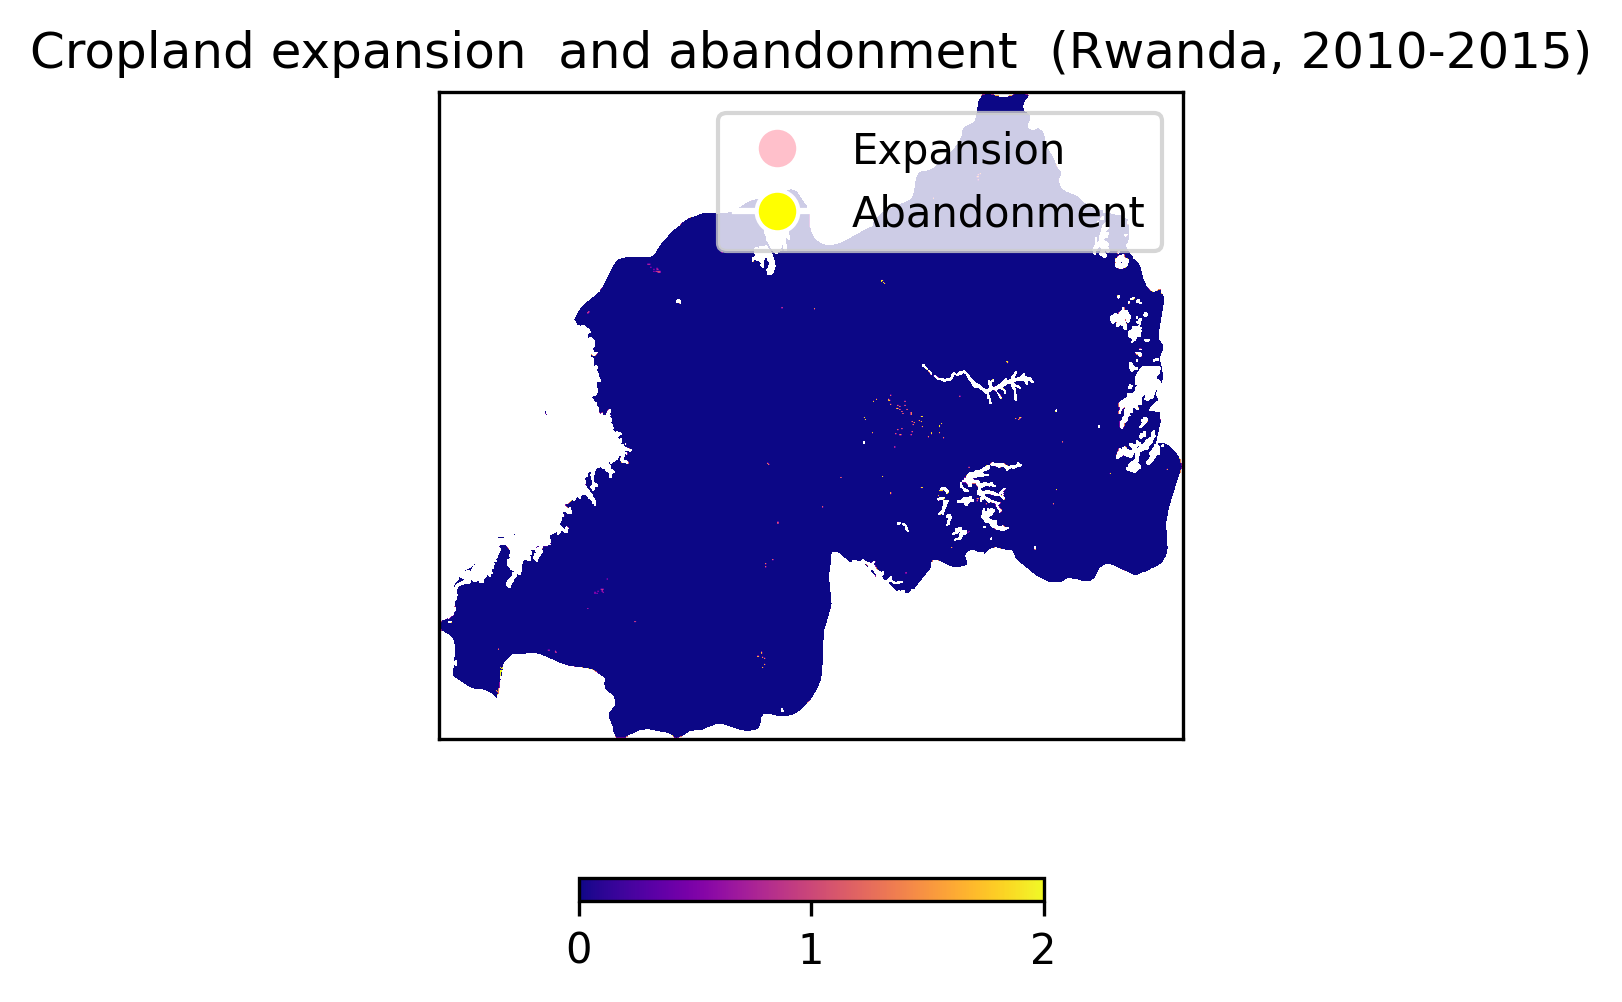

In [ ]:
#using the second method to make prettier plots
fig = plt.figure(figsize=(4, 4))
fig.set_dpi(300)

ax = fig.add_subplot()

# Set the title of this ax object
ax.set_title('Cropland expansion  and abandonment  (Rwanda, 2010-2015)')

# Using the ax we created, we call the imshow function on our array from earlier.
#  This create a new "im" object
im = ax.imshow(new_array2)

# To fix the outlier problem from before, we use the im object to set its limits.
im.set_clim(0, 2)

# Set the cbar to spectral
im.set_cmap('plasma')

# Get the cmap
cmap = im.get_cmap()
cmap.set_over('white', alpha=1.0)

# Get rid of the numbers on the axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

# Increase the dpi
fig.set_dpi(300)


# Add the colorbar to the figure. It will generate its values from the im object.
fig.colorbar(im, orientation='horizontal', shrink=0.5)

# Add legend
legend_labels = {1: 'Expansion', 2: 'Abandonment'}
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', 
markerfacecolor='pink', markersize=10, label=legend_labels[1]),
                    plt.Line2D([0], [0], marker='o', color='w', 
                    markerfacecolor='yellow', markersize=10, label=legend_labels[2])])


plt.show()

### Part f.

Use the two cropland binary rasters you processed above and make a new raster as follows:

0 = Never cropland
1 = Cropland in 2000 only
2 = Cropland in 2010 only
3 = Cropland in 2015 only
4 = Cropland in 2000 and 2010
5 = Cropland in 2000 and 2015
6 = Cropland in 2010 and 2015
7 = Cropland in 2000, 2010, and 2015

Plot this raster using imshow. Add a legend indicating what each value means.

A tip for you: when you are combining multiple logical statements in numpy, each individual logical statement must be surrounded by parentheses. Additionally, you have to use the bitwise logical operators & and | instead of the normal logical operators and and or (numpy requires this for specificity).

For example, np.where((a == 1) & (b == 2)) will return the indices where a is 1 and b is 2. If you do np.where(a == 1 & b == 2) or np.where((a == 1) and (b == 2)), you will get an error.

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[  3   5   6   7 210 255]


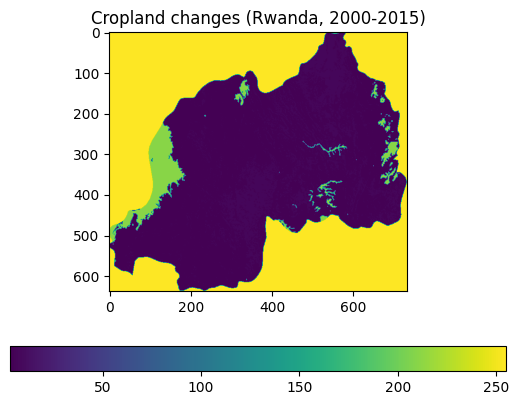

In [ ]:
#2F Answer
#create an empty array of same shape and name it new_array
new_array3 = np.copy(array_2000)
new_array3[np.logical_and(reclassified_array_2000 == 0, reclassified_array_2010 == 0, 
reclassified_array_2015 == 0)] = 0
new_array3[np.logical_and(reclassified_array_2000 == 1, reclassified_array_2010 == 0,
 reclassified_array_2015 == 0)] = 1
new_array3[np.logical_and(reclassified_array_2000 == 0, reclassified_array_2010 == 1, 
reclassified_array_2015 == 0)] = 2
new_array3[np.logical_and(reclassified_array_2000 == 0, reclassified_array_2010 == 0, 
reclassified_array_2015 == 1)] = 3
new_array3[np.logical_and(reclassified_array_2000 == 1, reclassified_array_2010 == 1, 
reclassified_array_2015 == 0)] = 4
new_array3[np.logical_and(reclassified_array_2000 == 1, reclassified_array_2010 == 0, 
reclassified_array_2015 == 1)] = 5
new_array3[np.logical_and(reclassified_array_2000 == 0, reclassified_array_2010 == 1, 
reclassified_array_2015 == 1)] = 6
new_array3[np.logical_and(reclassified_array_2000 == 1, reclassified_array_2010 == 1, 
reclassified_array_2015 == 1)] = 7
new_array3[reclassified_array_2000== 255] = 255
new_array3[reclassified_array_2010== 255] = 255
new_array3[reclassified_array_2015== 255] = 255
new_array3[reclassified_array_2000== 210] = 210
new_array3[reclassified_array_2010== 210] = 210
new_array3[reclassified_array_2015== 210] = 210


print(new_array3)

#print unique values of this new array (making sure it consist of 0 as no change, 
# 1 as expansion, 2 as abandonment and 3 as no data )
unique_new_array3 = np.unique(new_array3)
print(unique_new_array3)

#plot of reclassified LULC
plt.imshow(new_array3)
plt.title('Cropland changes (Rwanda, 2000-2015)')
plt.colorbar(orientation='horizontal')
plt.show()

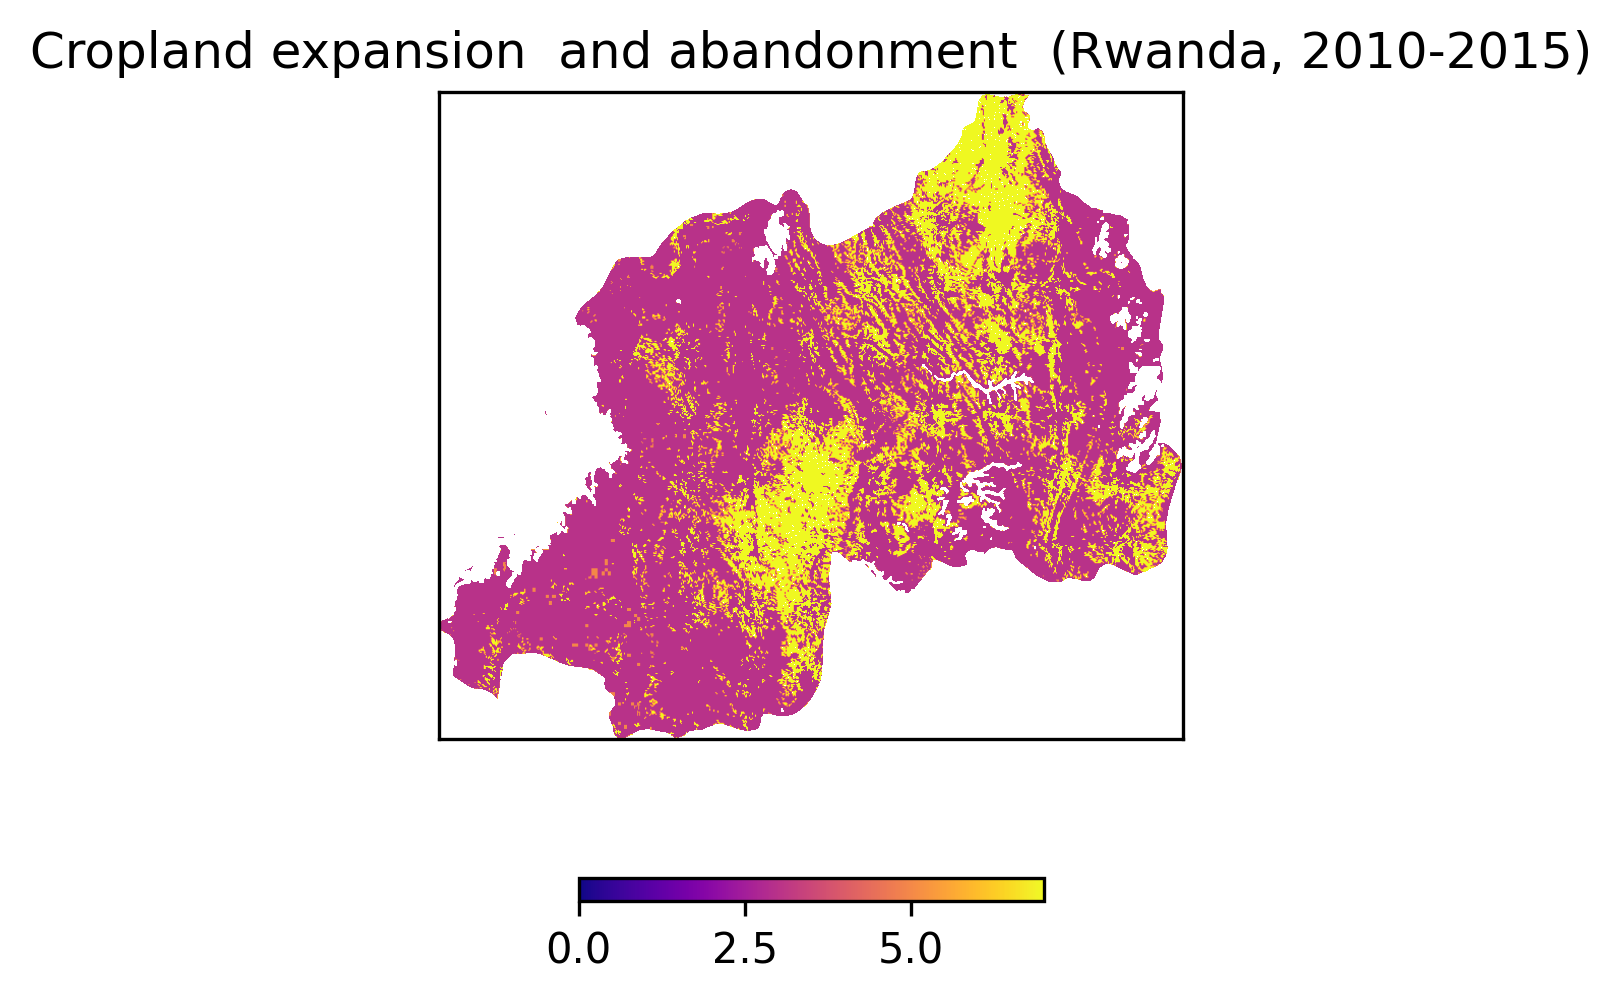

In [ ]:
#using the second method to make prettier plots
fig = plt.figure(figsize=(4, 4))
fig.set_dpi(300)

ax = fig.add_subplot()

# Set the title of this ax object
ax.set_title('Cropland expansion  and abandonment  (Rwanda, 2010-2015)')

# Using the ax we created, we call the imshow function on our array from earlier. 
# This create a new "im" object
im = ax.imshow(new_array3)

# To fix the outlier problem from before, we use the im object to set its limits.
im.set_clim(0, 7)

# Set the cbar to spectral
im.set_cmap('plasma')

# Get the cmap
cmap = im.get_cmap()
cmap.set_over('white', alpha=1.0)

# Get rid of the numbers on the axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

# Increase the dpi
fig.set_dpi(300)


# Add the colorbar to the figure. It will generate its values from the im object.
fig.colorbar(im, orientation='horizontal', shrink=0.5)

plt.show()

### Part g.

Describe your results. What do you notice about the spatial patterns of cropland expansion and abandonment? What do you think might be driving these patterns? Were they clustered in any specific area? Were the changes the same between 2000-2010 and 2010-2015?

## Question 2

For this question, you will analyze crops using two datasets:

1. FAOSTAT Production_Crops_E_All_Data_(Normalized).csv. You could download it yourself but please use the one in the Class's Data Directory.
2. MAPSPAM (Spatial Production Allocation Mode). You can find teh download listing here: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/PRFF8V Download the readme and all of the files that end with .geotiff.zip. Unzip them and put them in a folder called spam in your Class's Data Directory. This is a big download, so it may take a while. Go watch a show or something. I don't know, what do people do nowadays for fun?3. 

Sidenote: MAPSPAM was a competitor to the EARTHSTAT data we showed in class before. However, MAPSPAM continues to be updated and is more open-source, so I am in the process of switching my whole GTAP-InVEST model to it. 

You will choose 5 crops that interest you, making sure to select crops that are in both MAPSPAM and FAOSTAT dataset. You will want to refer to the ReadMe_v2r0_Global.txt file, which was available at the same download site for MAPSPAM, to identify what each of the different crops mean. For each crop you choose (use a loop), calculate the global sum of production tonnage for irrigated crops, all rainfed crops combined but excluding subsistence crops, and for all crops together. Report those values via print(). 

Next, for the same crops, compare how the value you calculated above compares to the value in the FAOSTAT dataset. To do this, you will need to use Pandas to load the CSV and then figure out how to get just the production tonnage values for the crops you are interested in. Interpret your results for your crops. Is FAO higher/lower than MAPSPAM? Do you notice any patterns to the difference?

In [ ]:
# Question 2 answer
#let us first import and read the faostat dataset using pandas
import pandas
import os

data_directory = '../../../../data'
Production_Crops= 'Production_Crops_E_All_Data_(Normalized).csv'
faostat_path = os.path.join(data_directory, Production_Crops)
fao_stat = pandas.read_csv(faostat_path, encoding='ISO-8859-1')
print(fao_stat)

         Area Code                                     Area  Item Code  \
0                2                              Afghanistan        221   
1                2                              Afghanistan        221   
2                2                              Afghanistan        221   
3                2                              Afghanistan        221   
4                2                              Afghanistan        221   
...            ...                                      ...        ...   
2491550       5817  Net Food Importing Developing Countries       1735   
2491551       5817  Net Food Importing Developing Countries       1735   
2491552       5817  Net Food Importing Developing Countries       1735   
2491553       5817  Net Food Importing Developing Countries       1735   
2491554       5817  Net Food Importing Developing Countries       1735   

                        Item  Element Code         Element  Year Code  Year  \
0        Almonds, with shell    

In [ ]:
#Global sum of production tonnage for the five crops ireespective of technology used

#the five choosen crops are: wheat, rice, maize, barley, potatoes
#the five technogies are: 
#"A" = All technologies  together, 
#"I"= irrigated portion of crop, 
#"H" =rainfed high input,
#"L" =rainfed low input, 
#"S"= srainfed subsistence, 
#"R"= sum of all rainfed

crops_choosen = ['WHEA', 'RICE', 'MAIZ', 'BARL', 'POTA'] 
technology = ["A", "H", "I", "L", "R", "S"]
data_directory = '../../../../data'
spam_directory = os.path.join(data_directory, 'spam', 'spam2010v2r0_global_prod.geotiff')

for crop in crops_choosen:
    for tech in technology:
        filename = f'spam2010V2r0_global_P_{crop}_{tech}.tif'
        crop_geotiff_path = os.path.join(spam_directory,filename)
        crop_array = load_array(crop_geotiff_path)
        production = np.nansum(crop_array)
        print(f"Global sum of production tonnage for irrigated {crop}: {tech}", production)

Global sum of production tonnage for irrigated WHEA: A 666331300.0
Global sum of production tonnage for irrigated WHEA: H 353263230.0
Global sum of production tonnage for irrigated WHEA: I 234176000.0
Global sum of production tonnage for irrigated WHEA: L 43512840.0
Global sum of production tonnage for irrigated WHEA: R 423657920.0
Global sum of production tonnage for irrigated WHEA: S 9885824.0
Global sum of production tonnage for irrigated RICE: A 694490900.0
Global sum of production tonnage for irrigated RICE: H 93843250.0
Global sum of production tonnage for irrigated RICE: I 535375800.0
Global sum of production tonnage for irrigated RICE: L 7025792.0
Global sum of production tonnage for irrigated RICE: R 150616800.0
Global sum of production tonnage for irrigated RICE: S 32751144.0
Global sum of production tonnage for irrigated MAIZ: A 844649300.0
Global sum of production tonnage for irrigated MAIZ: H 509916220.0
Global sum of production tonnage for irrigated MAIZ: I 204821730.0
Gl

In [ ]:
# now lets create loops based on what the question asked
#firstly for global sum of production tonnage for irrigated crops

crops_choosen = ['WHEA', 'RICE', 'MAIZ', 'BARL', 'POTA']
technology = ["I"]
data_directory = '../../../../data'
spam_directory = os.path.join(data_directory, 'spam', 'spam2010v2r0_global_prod.geotiff')

for crop in crops_choosen:
    for tech in technology:
        filename = f'spam2010V2r0_global_P_{crop}_{tech}.tif'
        crop_geotiff_path = os.path.join(spam_directory,filename)
        crop_array = load_array(crop_geotiff_path)
        production = np.nansum(crop_array)
        print(f"Global sum of production tonnage for irrigated {crop}:", production)

Global sum of production tonnage for irrigated WHEA: 234176000.0
Global sum of production tonnage for irrigated RICE: 535375800.0
Global sum of production tonnage for irrigated MAIZ: 204821730.0
Global sum of production tonnage for irrigated BARL: 6189262.0
Global sum of production tonnage for irrigated POTA: 71665840.0


In [ ]:
#now for global sum of production tonnage for rianfed crops exclusing sustinence

crops_choosen = ['WHEA', 'RICE', 'MAIZ', 'BARL', 'POTA']
technology = ["A", "H", "I", "L", "R"]
data_directory = '../../../../data'
spam_directory = os.path.join(data_directory, 'spam', 'spam2010v2r0_global_prod.geotiff')

for crop in crops_choosen:
    sum_rainfed = 0 
    for tech in technology:

        # I do realise I could do this without the secondloop, but I was trying 
        # to use an else statement 
        #to answer all three questions together but could not succeed 

        if tech in ["H", "L"]:
            filename = f'spam2010V2r0_global_P_{crop}_{tech}.tif'
            crop_geotiff_path = os.path.join(spam_directory,filename)
            crop_array = load_array(crop_geotiff_path)
            production = np.nansum(crop_array)
            sum_rainfed += production
    print(f"Total production for all rainfed {crop} exclusing substitence {crop} ", sum_rainfed)     
     
   

Total production for all rainfed WHEA exclusing substitence WHEA  396776072.0
Total production for all rainfed RICE exclusing substitence RICE  100869040.0
Total production for all rainfed MAIZ exclusing substitence MAIZ  583687248.0
Total production for all rainfed BARL exclusing substitence BARL  99801789.0
Total production for all rainfed POTA exclusing substitence POTA  212320848.0


In [ ]:
#now for global sum of production tonnage for all technologies combined

crops_choosen = ['WHEA', 'RICE', 'MAIZ', 'BARL', 'POTA']
technology = ["A"]
data_directory = '../../../../data'
spam_directory = os.path.join(data_directory, 'spam', 'spam2010v2r0_global_prod.geotiff')

for crop in crops_choosen:
    for tech in technology:
        filename = f'spam2010V2r0_global_P_{crop}_{tech}.tif'
        crop_geotiff_path = os.path.join(spam_directory,filename)
        crop_array = load_array(crop_geotiff_path)
        production = np.nansum(crop_array)
        print(f"Global sum of production tonnage for all {crop} together:", production)

Global sum of production tonnage for all WHEA together: 666331300.0
Global sum of production tonnage for all RICE together: 694490900.0
Global sum of production tonnage for all MAIZ together: 844649300.0
Global sum of production tonnage for all BARL together: 127393920.0
Global sum of production tonnage for all POTA together: 337903940.0


In [ ]:
# now lets print the total production for five of our choosen crop form the 
# fao_stat we created above

# before that let's briefly glimpse the name of columns
print('List of column names:', fao_stat.columns)

#here I adjust the five choosen crop names based on the fao_stat dataset
crop_choosen= ["Wheat", "Maize", "Rice, paddy", "Potatoes", "Barley"]

for crop in crop_choosen:
    # now I filter the fao_stat dataset for each crops, then sum up their production
    crop_df = fao_stat[(fao_stat['Item'] == crop) & (fao_stat['Year'] == 2010) 
    & (fao_stat['Element Code'] == 5510)] # element code:5510 = production
    production = crop_df['Value'].sum()
    print(f"Production tonnage for {crop} in 2010: ",production, "tonnes.")

List of column names: Index(['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element',
       'Year Code', 'Year', 'Unit', 'Value', 'Flag'],
      dtype='object')
Production tonnage for Wheat in 2010:  3012498110.0 tonnes.
Production tonnage for Maize in 2010:  3834530676.0 tonnes.
Production tonnage for Rice, paddy in 2010:  3526873545.0 tonnes.
Production tonnage for Potatoes in 2010:  1592197392.0 tonnes.
Production tonnage for Barley in 2010:  566391692.0 tonnes.


As we can see the production tonnage we get from FAOSTAT dataset is pretty huge as compared to the global sum we computed for all technologies together in the cell just before. The reason for this is because, the FAOSTAT dataset also includes additional areas apart from the countries of teh world. If we print the tail of the dataset (even upto 200000 rows) we can see non country areas like continents, low income countries and others. Since, we are summing up the prdouction value for all areas we are getting this huge values.

In [ ]:
#print the tail of the fao_stat
fao_stat.tail(200000)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
2291555,5500,Oceania,210,Lupins,5510,Production,1990,1990,tonnes,757670.0,A
2291556,5500,Oceania,210,Lupins,5510,Production,1991,1991,tonnes,1047363.0,A
2291557,5500,Oceania,210,Lupins,5510,Production,1992,1992,tonnes,1194983.0,A
2291558,5500,Oceania,210,Lupins,5510,Production,1993,1993,tonnes,1479700.0,A
2291559,5500,Oceania,210,Lupins,5510,Production,1994,1994,tonnes,1076210.0,A
...,...,...,...,...,...,...,...,...,...,...,...
2491550,5817,Net Food Importing Developing Countries,1735,Vegetables Primary,5510,Production,2014,2014,tonnes,80046102.0,A
2491551,5817,Net Food Importing Developing Countries,1735,Vegetables Primary,5510,Production,2015,2015,tonnes,83042366.0,A
2491552,5817,Net Food Importing Developing Countries,1735,Vegetables Primary,5510,Production,2016,2016,tonnes,82575747.0,A
2491553,5817,Net Food Importing Developing Countries,1735,Vegetables Primary,5510,Production,2017,2017,tonnes,82311014.0,A
